# K-Means Clustering

#### Load the packages and import the data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("./Data Files/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Subset the data into X

In [3]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### Center and Scale X

In [4]:
X_scaled = (X - X.mean()) / X.std()

#### Fit the K-Means Clustering Model using the Elbow Method to optimize K

In [8]:
from sklearn.cluster import KMeans
wcss = []
max_clusters = 10  # Specify value

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters = i, random_state = 1111)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

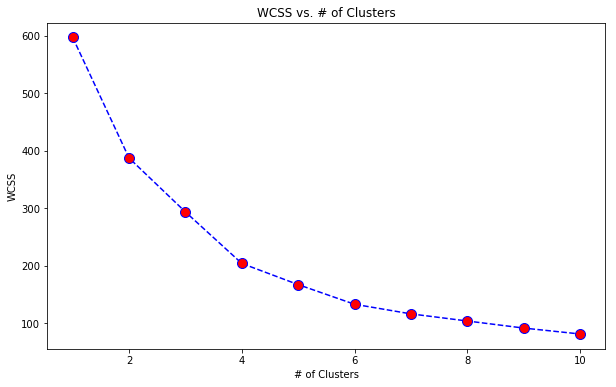

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(max_clusters, wcss, color = 'blue', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('WCSS vs. # of Clusters')
plt.xlabel("# of Clusters")
plt.ylabel("WCSS")

In [9]:
wcss

[597.0,
 387.43925801165489,
 293.73618492477112,
 204.19902173937533,
 167.4063422746905,
 133.21942586025366,
 116.50259446737952,
 104.1262760713615,
 91.841871117857835,
 81.553665917093156]

#### Fit and evaluate new model using the new "optimal" number of clusters obtained from elbow plot above

In [36]:
kmeans_model = KMeans(n_clusters = 5,  # Tune this parameter using plot above 
                      random_state = 1111)
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1111, tol=0.0001, verbose=0)

#### Assign each observation to a cluster

In [37]:
cluster_pred = kmeans_model.labels_
pred_summary = X.copy()
pred_summary["cluster"] = cluster_pred  # dependent variable
pred_summary.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
